<h1>Linkedin Data Science Job Postings Analysis<h1>

In [177]:
# importing libaries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt

import re

In [178]:
### Data cleaning

# loading the raw webscraped data
df_raw = pd.read_csv(r'C:\Users\aedan\PycharmProjects\Data_Science_Job_Openings\CSV\job_positions_merged - Copy.csv')

# dropping empty strings in the jobs description
df_raw['job_desc'].replace('', np.nan, inplace=True)
df_raw.dropna(subset=['job_desc'], inplace=True)

# removing duplicates based on all columns
df_raw.drop_duplicates(keep='first', inplace=True)

# deleting unwanted job positions
df_c = df_raw[df_raw['job_title'].str.contains('AI|ML|Daten|Data', na=False)]
df_c

,job_title,company,location,work_type,job_desc
4,(Senior) Consultant (w/m/d) Data Engineering,WTS Karriere,Deutschland,Remote,Ihre Aufgaben | Your tasks:\nDu designst und e...
12,Junior AI Engineer,Teltec AG,"Mainz, Rheinland-Pfalz, Deutschland",Hybrid,We looking for a junior/ senior AI Engineer wi...
31,Data Catalyst Team Lead (f/m/d) Business Opera...,Siemens Energy,"Berlin, Berlin, Deutschland",Hybrid,Data Catalyst Team Lead – Business Operations\...
38,Big Data,Finanzguru,Deutschland,Vor Ort,Deine Mission\n\nDu arbeitest mit einem interd...
45,Senior Data Engineer (all genders),Zühlke Group,"Berlin, Berlin, Deutschland",Remote,Software Engineering\n\nWelche Aufgaben erwart...
...,...,...,...,...,...
1344,Praktikant im Bereich Data Analytics (w/m/x),BMW Group,"Munich, Bavaria, Germany",On-site,DIE ZUKUNFT DER MOBILITÄT? DIGITAL.\n\nTEILE D...
1345,Werkstudent (w/m/d) Data Science / Data Analytics,KPMG Deutschland,"Leipzig, Saxony, Germany",On-site,Gestalte bereits als Werkstudent (w/m/d) im Be...
1350,Data Analyst (m/w/d) Marketing & Analytics,Samsung Electronics,"Schwalbach, Hesse, Germany",Hybrid,Position Summary\nWerden Sie Teil einer großen...
1351,Data Analytics & Consulting Intern (m/w/d) | C...,Picnic Technologies,"Düsseldorf, North Rhine-Westphalia, Germany",On-site,"At Picnic, we're revolutionizing the way peopl..."


In [179]:
# generating seniority variable
def seniority(a):
    if 'Praktikant' in a:
        return 'Intern'
    elif 'Werkstudent' in a:
        return 'Intern'
    elif 'Intern' in a:
        return 'Intern'
    elif 'Trainee' in a:
        return 'Trainee'
    elif 'Junior' in a:
        return 'Junior'
    elif 'Senior' in a:
        return 'Senior'
    elif 'Manager' in a:
        return 'Senior'
    elif 'Lead' in a:
        return 'Senior'
    else:
        return 'Mid-level'

df_c['seniority'] = df_c.job_title.apply(lambda x: seniority(x))

# saving the cleaned df
df_c.to_csv(r'data_science_jobs.csv', index=False)
df_c

,job_title,company,location,work_type,job_desc,seniority
4,(Senior) Consultant (w/m/d) Data Engineering,WTS Karriere,Deutschland,Remote,Ihre Aufgaben | Your tasks:\nDu designst und e...,Senior
12,Junior AI Engineer,Teltec AG,"Mainz, Rheinland-Pfalz, Deutschland",Hybrid,We looking for a junior/ senior AI Engineer wi...,Junior
31,Data Catalyst Team Lead (f/m/d) Business Opera...,Siemens Energy,"Berlin, Berlin, Deutschland",Hybrid,Data Catalyst Team Lead – Business Operations\...,Senior
38,Big Data,Finanzguru,Deutschland,Vor Ort,Deine Mission\n\nDu arbeitest mit einem interd...,Mid-level
45,Senior Data Engineer (all genders),Zühlke Group,"Berlin, Berlin, Deutschland",Remote,Software Engineering\n\nWelche Aufgaben erwart...,Senior
...,...,...,...,...,...,...
1344,Praktikant im Bereich Data Analytics (w/m/x),BMW Group,"Munich, Bavaria, Germany",On-site,DIE ZUKUNFT DER MOBILITÄT? DIGITAL.\n\nTEILE D...,Intern
1345,Werkstudent (w/m/d) Data Science / Data Analytics,KPMG Deutschland,"Leipzig, Saxony, Germany",On-site,Gestalte bereits als Werkstudent (w/m/d) im Be...,Intern
1350,Data Analyst (m/w/d) Marketing & Analytics,Samsung Electronics,"Schwalbach, Hesse, Germany",Hybrid,Position Summary\nWerden Sie Teil einer großen...,Mid-level
1351,Data Analytics & Consulting Intern (m/w/d) | C...,Picnic Technologies,"Düsseldorf, North Rhine-Westphalia, Germany",On-site,"At Picnic, we're revolutionizing the way peopl...",Intern


Text(0.5, 1.0, 'Top 15 Companies By Job Postings')

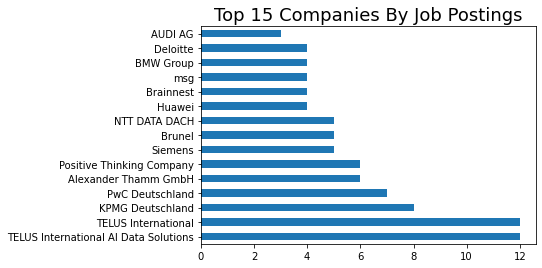

In [180]:
### Data Description   

# companies bar plot
df_c.company.value_counts()[:15].plot(kind='barh')
plt.title('Top 15 Companies By Job Postings', fontsize=18)

Telus International, an IT company is has the most job openings by far at 24. My dataset could well be biased here, since Telus paid for advertised job openings, which makes their job openings apear more frequent than others. 

Other than that, there is a big mix of industries looking for data scientists, such as consultancies (PWC, Deloitte), car industry (AUDI, BMW) and IT (Huawei).

Text(0, 0.5, 'Count')

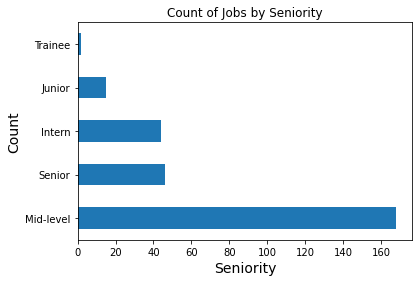

In [181]:
# bar plot of role type (seniority)
df_c.seniority.value_counts().plot(kind='barh')
plt.title('Count of Jobs by Seniority')
plt.xlabel('Seniority', fontsize=14)
plt.ylabel('Count', fontsize=14)


By far most of the job openings are for mid level jobs. The other role types are fairly similar.

Text(0.5, 1.0, 'Demanded Skills')

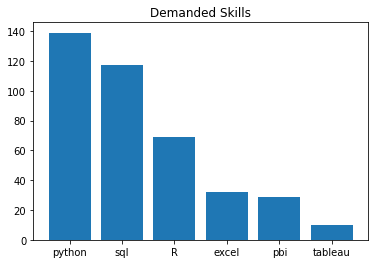

In [182]:
# Counting desired software/programming skills
python = df_c.job_desc.str.count('Python').sum()     
R = df_c.job_desc.str.count('R ').sum()         
tableau = df_c.job_desc.str.count('Tableau').sum()     
pbi = df_c.job_desc.str.count('Power BI').sum()  
excel = df_c.job_desc.str.count('Excel').sum()   
sql = df_c.job_desc.str.count('SQL').sum()

skills = ['python', 'R', 'pbi', 'tableau', 'excel', 'sql']
counts = [python, R, tableau, pbi, excel, sql]
dic = {'Skills': skills, 'Counts': counts}

df_1 = pd.DataFrame(dic)

df_sorted = df_1.sort_values('Counts',ascending=False)
df_sorted

plt.bar('Skills', 'Counts', data = df_sorted)
plt.title('Demanded Skills')

* we can see the most demaned skill is Python with SQL being a clode second. Other job posting analyses have shown that SQL is the most demanded skill. 
* similarly, it was excepcted that python as a programming language is more sought after than R
* regards to data visualisation tools Microsoft's Power BI is in higher demand than Tableau
* surprisingly, Excel ist only the fourth important skill

Text(0.5, 1.0, 'Data Associated Roles')

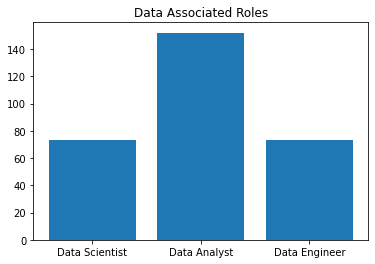

In [183]:
# counting different data assosciated roles
data_sc = df_c.job_title.str.count("Data Analy").sum()
data_an = df_c.job_title.str.count("Data Scien").sum()
data_en = df_c.job_title.str.count("Data En").sum()

# setting up a dictionary of the above
dict_2 = {'Role': ['Data Scientist', 'Data Analyst', 'Data Engineer'],
        'Count': [data_sc, data_an, data_sc]}

# saving it in a df    
df_2 = pd.DataFrame(dict_2)

# bar plot
plt.bar('Role', 'Count', data=dict_2)
plt.title('Data Associated Roles')

* the most sought after data associated role is the Data Analyst
* with almost twice as many job postings as Data Scientists and Data Engineer
* contrary to my expectation Data Engineers are not as highly demanded

Text(0.5, 0, 'Location counts')

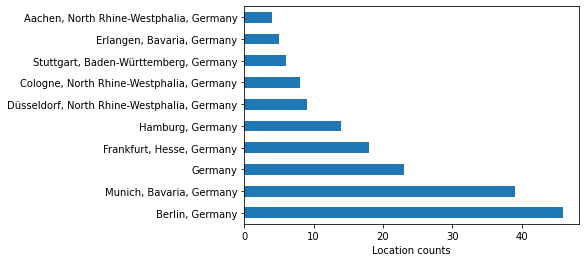

In [201]:
# creating a copy of the original df to overcome 'SettingWithCopyWarning'
df_copy = df_c.copy(deep=True)

replace_values = {'München': 'Munich', 'Deutschland' : 'Germany', 'Berlin, Berlin': 'Berlin', 'Hamburg, Hamburg': 'Hamburg', 'Bayern': 'Bavaria'}

# replacing ambiguity in the location column
df_copy['location'] = df_copy['location'].replace('Deutschland', 'Germany', regex=True)
df_copy['location'] = df_copy['location'].replace('Berlin, Berlin', 'Berlin', regex=True)
df_copy['location'] = df_copy['location'].replace('Hamburg, Hamburg', 'Hamburg',regex=True)
df_copy['location'] = df_copy['location'].replace('Bayern', 'Bavaria', regex=True)
df_copy['location'] = df_copy['location'].replace('München', 'Munich', regex=True)
df_copy['location'] = df_copy['location'].replace('Frankfurt am Main', 'Frankfurt', regex=True)
df_copy['location'] = df_copy['location'].replace('Hessen', 'Hesse', regex=True)
df_copy['location'] = df_copy['location'].replace('Nordrhein-Westfalen', 'North Rhine-Westphalia', regex=True)
df_copy['location'] = df_copy['location'].replace('Köln', 'Cologne', regex=True)

df_copy.location.value_counts()[:10].plot(kind='barh')
plt.xlabel('Location counts')

* Berlin offers the most roles
* clearly the big metropolitan cities with the highest population in Germany are offering most of the jobs
* except Berlin all cities in the top ten are in the west
* interestingly 'Germany' ranks third, suggesting that these jobs are all remote 

<AxesSubplot:>

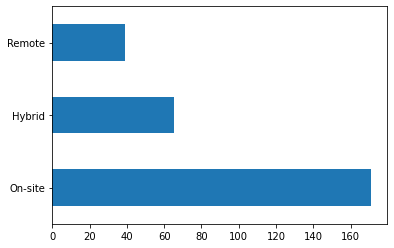

In [202]:
# work type analysis
df_c['work_type'] = df_c['work_type'].replace('Vor Ort', 'On-site', regex=True)

# bar plot
df_c.work_type.value_counts().plot(kind='barh')


* most jobs in Germany still require on-site working
* more than half of the jobs require on-site working

<AxesSubplot:>

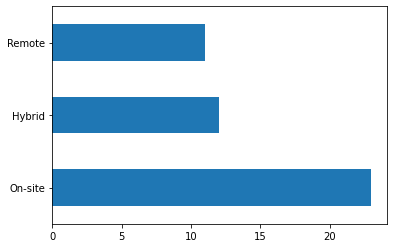

In [229]:
# filtering work type based on the top four cities with the most job openings

df_berlin = df_copy[df_copy['location'] == 'Berlin, Germany'] 
df_munich = df_copy[df_copy['location'] == 'Munich, Bavaria, Germany'] 
df_ff = df_copy[df_copy['location'] == 'Frankfurt, Hesse, Germany'] 
df_hb = df_copy[df_copy['location'] == 'Hamburg, Germany']

# bar plot berlin
df_berlin.work_type.value_counts().plot(kind='barh')

<AxesSubplot:>

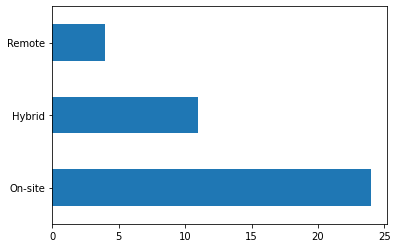

In [230]:
df_munich.work_type.value_counts().plot(kind='barh')

<AxesSubplot:>

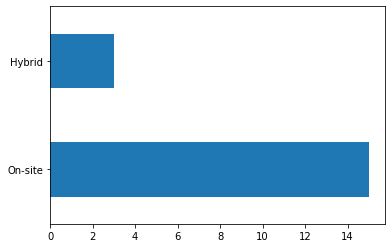

In [231]:
# bar plot frankfurt
df_ff.work_type.value_counts().plot(kind='barh')

<AxesSubplot:>

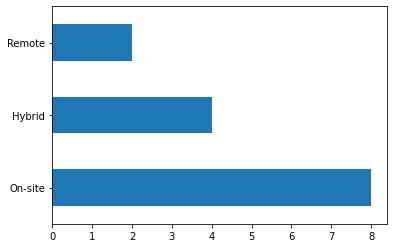

In [232]:
# bar plot hamburg
df_hb.work_type.value_counts().plot(kind='barh')

Overall we can see there is not a lot of variation between the work type for different cities. The only outlier here is Frankfurt where there are not remote job positions for my dataset. This maybe because Frankfurt is a big financial hub in which on-site work is usually prefered

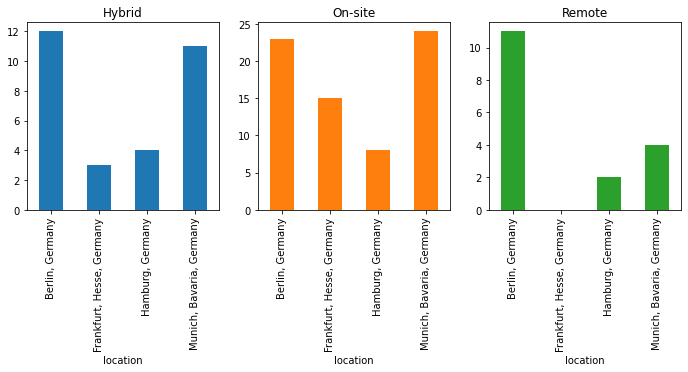

In [256]:
#creating a new df from the sub df of each city above
frames = [df_munich, df_berlin, df_ff, df_hb]
df_wt = pd.concat(frames)

# get the value count of each work_type by location and pivot the shape
dfp = df_wt.value_counts(subset=['location', 'work_type']).reset_index(name='VC').pivot(index='location', columns='work_type', values='VC')

# plot the dataframe
fig = dfp.plot(kind='bar', subplots=True, layout=(5, 5), figsize=(20, 20), legend=False)

* Berlin offers the most remote jobs, this is likely due to them offering the most jobs overall
* however, comparing Berlin to Munich we can clearly see that Munich offers less remote jobs and that they prefer working on site or hybrid